In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

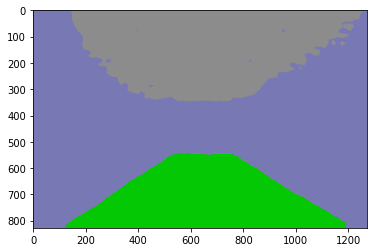

In [2]:
img = cv2.imread('19.jpg')
plt.imshow(img)

In [146]:
ymax = img.shape[0]

In [3]:
lower_green = np.array([0,150,0])
upper_green = np.array([10,200,30])
mask = cv2.inRange(img, lower_green, upper_green)
res = cv2.bitwise_and(img, img, mask= mask)

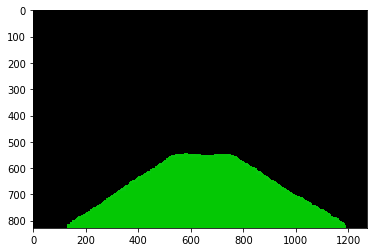

In [4]:
kernel = np.ones((15,15),np.uint8)
closing = cv2.morphologyEx(res, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing)
plt.show()

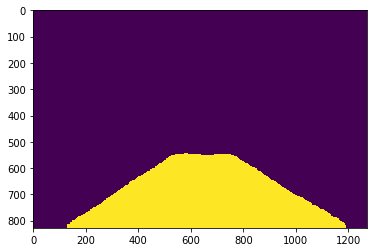

In [5]:
closing = cv2.cvtColor(closing, cv2.COLOR_BGR2GRAY)
closing[np.where(closing != 0)] = 255
plt.imshow(closing)

In [6]:
# Takes a binary image
def findContours(img):
    contours,hierarchy = cv2.findContours(img, 1, 2)
    max_contour = 0
    for i in range(len(contours)):
        curr = contours[i].shape[0]
        if(curr > max_contour):
            max_contour = i
    print(i)       
    cnt = contours[max_contour]
    return cnt

In [8]:
cnt=findContours(closing)

0


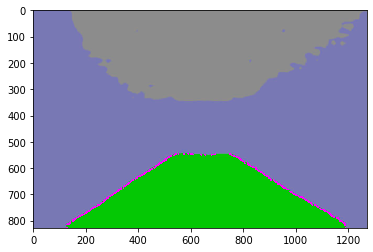

In [15]:
img = cv2.imread('19.jpg')
plt.imshow(cv2.drawContours(img, cnt, -20, (255,0,255), 5))

In [48]:
# hull = cv2.convexHull(cnt)
# hull

In [49]:
# plt.imshow(cv2.drawContours(img, [hull], -20, (255,0,0), 10))

In [61]:
cnt.shape[0]

634

In [62]:
y_coordinates = []
for i in range((cnt.shape[0])):
    y_coordinates.append(cnt[i][0][1])

In [89]:
y_percentile = np.percentile(y_coordinates, 5)
y_percentile

551.0

In [90]:
x_percentile = np.percentile(x_coordinates, 50)
x_percentile

692.5

In [69]:
import pandas as pd
import numpy as np
data = cnt

In [77]:
cnt.shape[0]

634

In [78]:
x_coordinates = [cnt[i][0][0] for i in range(cnt.shape[0])]
y_coordinates = [cnt[i][0][y] for i in range(cnt.shape[0])]

In [80]:
df=pd.DataFrame(columns = ['x', 'y'])

In [82]:
df['x'] = x_coordinates
df['y'] = y_coordinates

In [86]:
# df

In [122]:
# Filter left side, right side and top middle horizontal points 
df_left = df.loc[(df['x'] <= x_percentile) & (df['y'] > y_percentile)]
df_right = df.loc[(df['x'] >= x_percentile) & (df['y'] > y_percentile)]
df_top_horizontal = df.loc[(df['y'] <= y_percentile)]

In [123]:
df_left.shape, df_right.shape, df_top_horizontal.shape

((292, 2), (308, 2), (34, 2))

In [124]:
left_points = np.array(df_left)
right_points = np.array(df_right)
top_horizontal_points = np.array(df_top_horizontal)

In [126]:
left_points.shape

(292, 2)

In [202]:
from sklearn.linear_model import LinearRegression
def getFittingLine(points):
    model = LinearRegression()
    X = points[:,0].reshape(-1, 1)
    Y = points[:,1].reshape(-1, 1)
    model.fit(X, Y)
    m = model.coef_
    b = model.intercept_
    line = model.predict(X)
    return m, b, line

In [203]:
m1, b1, l1 = getFittingLine(left_points)
m2, b2, l2 = getFittingLine(top_horizontal_points)
m3, b3, l3 = getFittingLine(right_points)

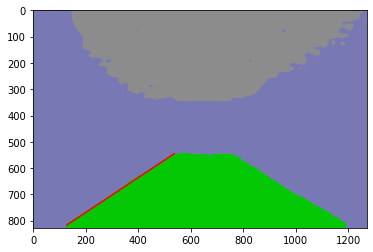

In [210]:
plt.figure()
img = cv2.imread('19.jpg')
plt.imshow(img)
plt.plot(left_points[:,0].reshape(-1, 1), l1, 'r-')

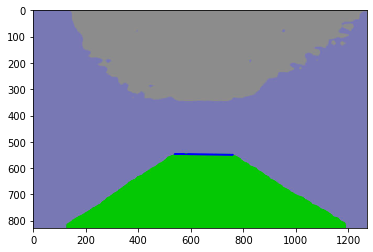

In [211]:
plt.figure()
img = cv2.imread('19.jpg')
plt.imshow(img)
plt.plot(top_horizontal_points[:,0].reshape(-1, 1), l2, 'b-')

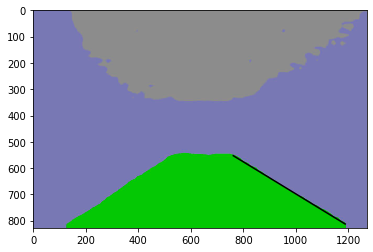

In [212]:
plt.figure()
img = cv2.imread('19.jpg')
plt.imshow(img)
plt.plot(right_points[:,0].reshape(-1, 1), l3, 'k-')

# Finding intersection points

In [213]:
x1 = (b1-b2) / (m2-m1)
y1 = m1 * x1 + b1

print('(x1,y1)',x1,y1)

(x1,y1) [[534.16868483]] [[547.16524113]]


In [216]:
x2 = (b2-b3) / (m3-m2)
y2 = m2 * x2 + b2

print('(x2,y2)',x2,y2)

(x2,y2) [[755.56648226]] [[549.0577393]]


# Show the intersection points

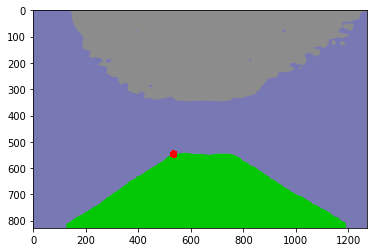

In [218]:
plt.imshow(cv2.circle(img,(int(x1[0][0]), int(y1[0][0])), 15, (255,0,0), -1))

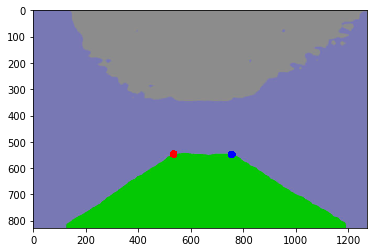

In [220]:
plt.imshow(cv2.circle(img,(int(x2[0][0]), int(y2[0][0])), 15, (0,0,255), -1))